In [1]:
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

C:\Users\Asus\AppData\Local\Temp\ipykernel_12424\2010655787.py:38: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(plt.gcf(), animate, interval=1000)


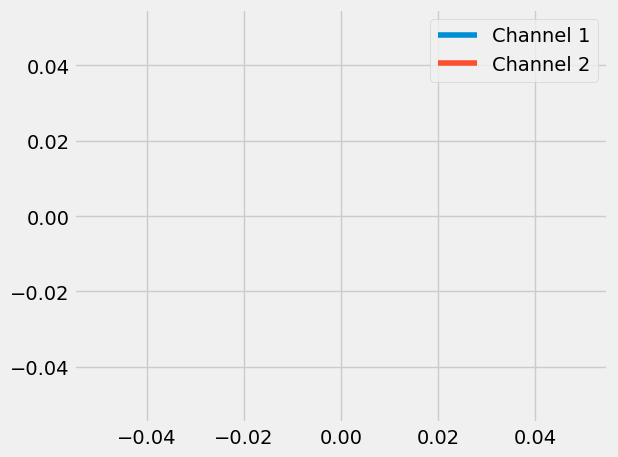

In [2]:
plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

plt.plot([], [], label='Channel 1')
plt.plot([], [], label='Channel 2')


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    ax = plt.gca()
    line1, line2 = ax.lines

    line1.set_data(x, y1)
    line2.set_data(x, y2)

    xlim_low, xlim_high = ax.get_xlim()
    ylim_low, ylim_high = ax.get_ylim()

    ax.set_xlim(xlim_low, (x.max() + 5))

    y1max = y1.max()
    y2max = y2.max()
    current_ymax = y1max if (y1max > y2max) else y2max

    y1min = y1.min()
    y2min = y2.min()
    current_ymin = y1min if (y1min < y2min) else y2min

    ax.set_ylim((current_ymin - 5), (current_ymax + 5))


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.legend()
plt.tight_layout()
plt.show()